In [1]:
#from netCDF4 import Dataset
#import matplotlib.pyplot as plt

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
import cartopy.feature as cfeature
import xarray as xr

In [3]:
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                cartopy_ylim, latlon_coords)

In [4]:
ncfile = Dataset('/Volumes/Seagate Backup Plus Drive/78_clyne_wrf-20220217T0827Z/wrfout_d01_2016-10-07_00_00_00_subset.nc')

In [5]:
slp = getvar(ncfile, 'slp')

In [6]:
smooth_slp = smooth2d(slp,3,cenweight = 4)

In [7]:
lats,lons = latlon_coords(slp)

In [8]:
cart_proj = get_cartopy(slp)

Text(0.5, 1.0, 'Sea Level Pressure (hPa)')

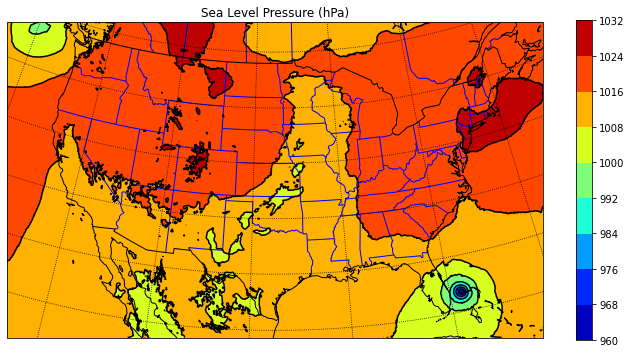

In [9]:
fig = plt.figure(figsize= (12,6))
ax = plt.axes(projection = cart_proj)

states = cfeature.NaturalEarthFeature(category= 'cultural',
                            scale = '50m',
                            facecolor = 'none',
                            name = 'admin_1_states_provinces_lines')

ax.add_feature(states,edgecolor = 'blue')
ax.add_feature(cfeature.BORDERS, edgecolor = 'black')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)


plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
            transform=crs.PlateCarree())

plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))
plt.colorbar(ax = ax, shrink = .98)




# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
ax.gridlines(color="black", linestyle="dotted")

plt.title("Sea Level Pressure (hPa)")


In [10]:
ds = xr.open_dataset('/Volumes/Seagate Backup Plus Drive/78_clyne_wrf-20220217T0827Z/wrfout_d01_2016-10-07_00_00_00_subset.nc')

In [11]:
getvar(ncfile, 'td').shape

(50, 1059, 1799)

In [55]:
!pwd

/Users/varungandhi
